# Employee Churn

In [353]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import seaborn as sns 
%matplotlib inline


# Read the data 

Examine the dataset 

In [354]:
df= pd.read_csv(r"C:\Users\User\Downloads\Employee-Churn-master\HR.csv.txt")
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Data quality check 

In [355]:
#check for any missing values 
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [356]:
# Rename Columns for better readability 
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'Churn'
                        })

In [357]:
df = df.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [358]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [359]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
Churn                    int64
promotion                int64
department              object
salary                  object
dtype: object

# Exploratory Data Analysis 

In [360]:
#How many employees in the dataset ? 
df.shape

(14999, 10)

In [361]:
#rate of Churn of the company 
Churn_rate = df.Churn.value_counts()/data.shape[0]
Churn_rate

Churn
0    0.761917
1    0.238083
Name: count, dtype: float64

In [362]:
#Describe the Statistical overview of the employees 
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


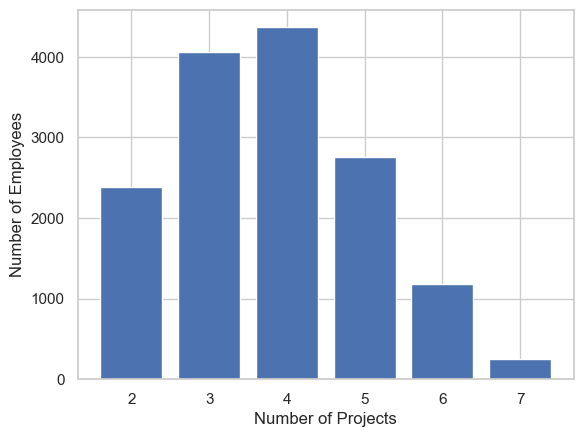

In [363]:
# Group by 'projectCount' and count the number of entries for each group
num_projects = df.groupby('projectCount').count()

# Plotting the data
plt.bar(num_projects.index.values, num_projects['satisfaction'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


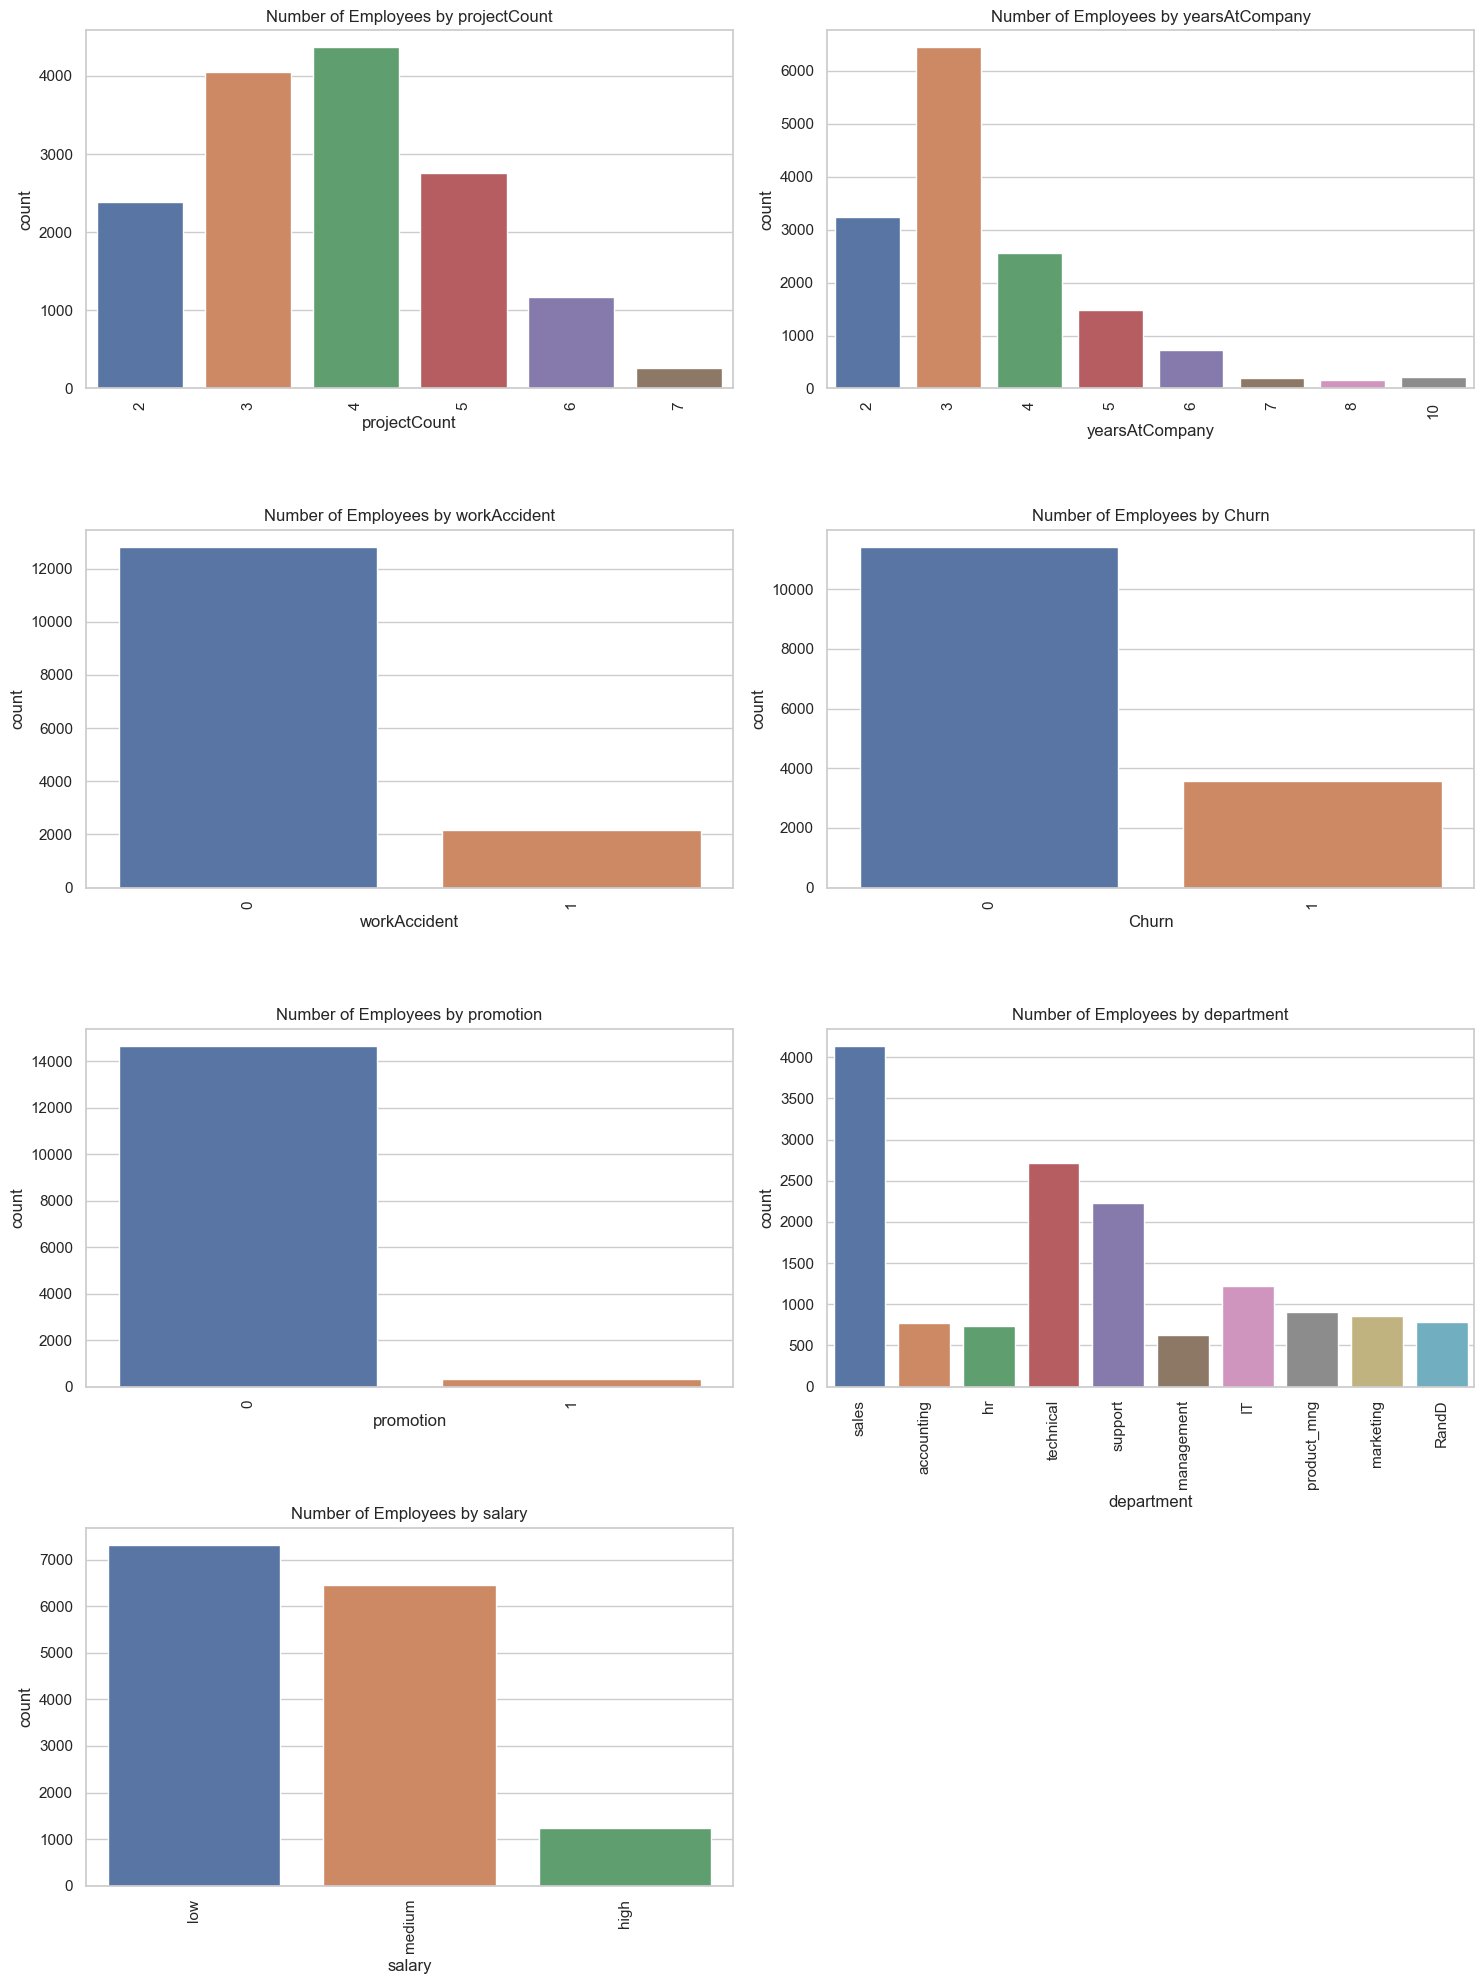

In [364]:
import seaborn as sns

# Define the correct features list based on your DataFrame's columns
features = ['projectCount', 'yearsAtCompany', 'workAccident', 'Churn', 'promotion', 'department', 'salary']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Number of Employees by {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


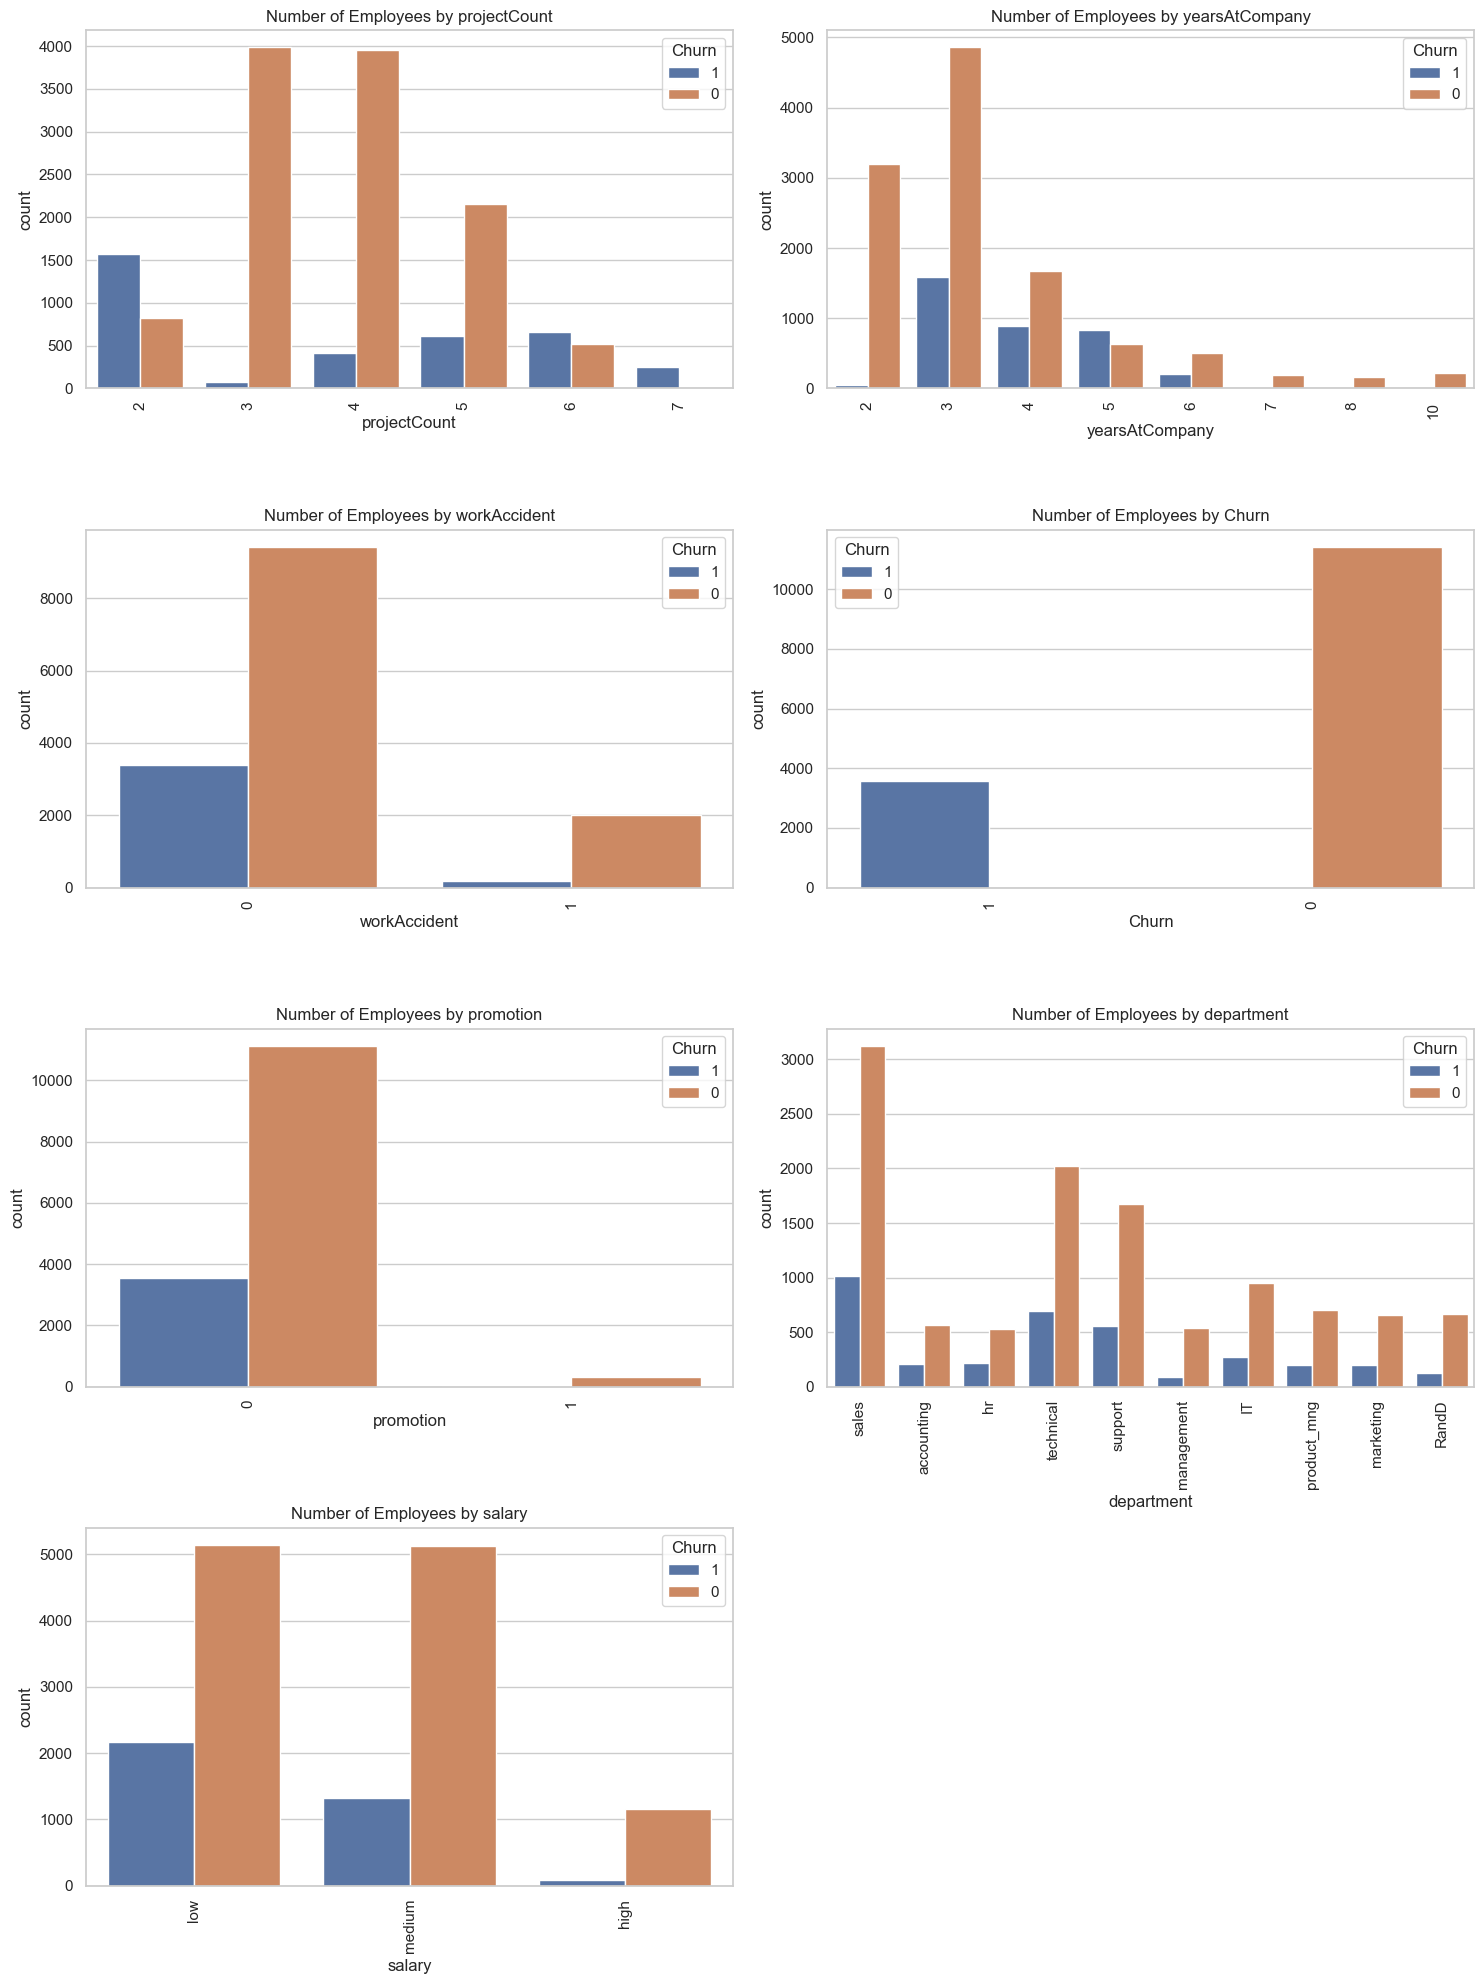

In [365]:
# Ensure columns are of the correct type
df['department'] = df['department'].astype(str)
df['salary'] = df['salary'].astype(str)
df['Churn'] = df['Churn'].astype(str)  # Ensure 'Churn' is treated as a categorical variable

# Define the correct features list based on your DataFrame's columns
features = ['projectCount', 'yearsAtCompany', 'workAccident', 'Churn', 'promotion', 'department', 'salary']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Number of Employees by {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [366]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by 'Churn' and compute the mean for each group
churn_summary = df.groupby('Churn')[numeric_cols].mean()
churn_summary

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Churn,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [367]:
#Create a Correlation matrix. To explain what features correlate the most with Churn, what other correlations can be found 
numeric_df = df.select_dtypes(include=[float, int])

# Create the correlation matrix
corr = numeric_df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


C:\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


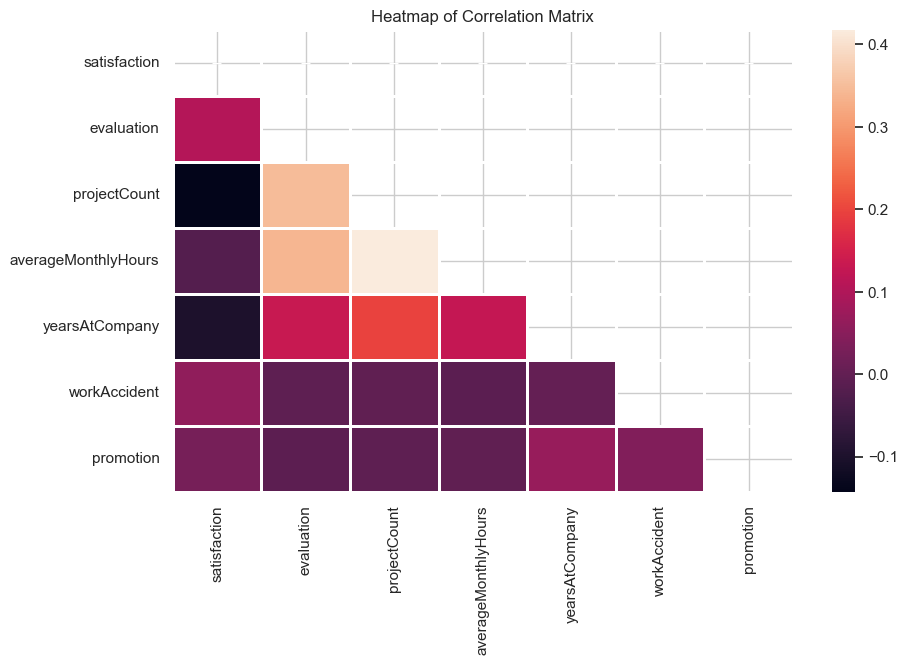

In [368]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
f, ax = plt.subplots(figsize=(10, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, linewidths=2.0, ax=ax)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## EDA 1. Distribution of Satisfaction, Evaluation, and Project Count

###### Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. 

C:\Users\User\AppData\Local\Temp\ipykernel_18548\3158379893.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
C:\Users\User\AppData\Local\Temp\ipykernel_18548\3158379893.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

Text(0, 0.5, 'Employee Count')

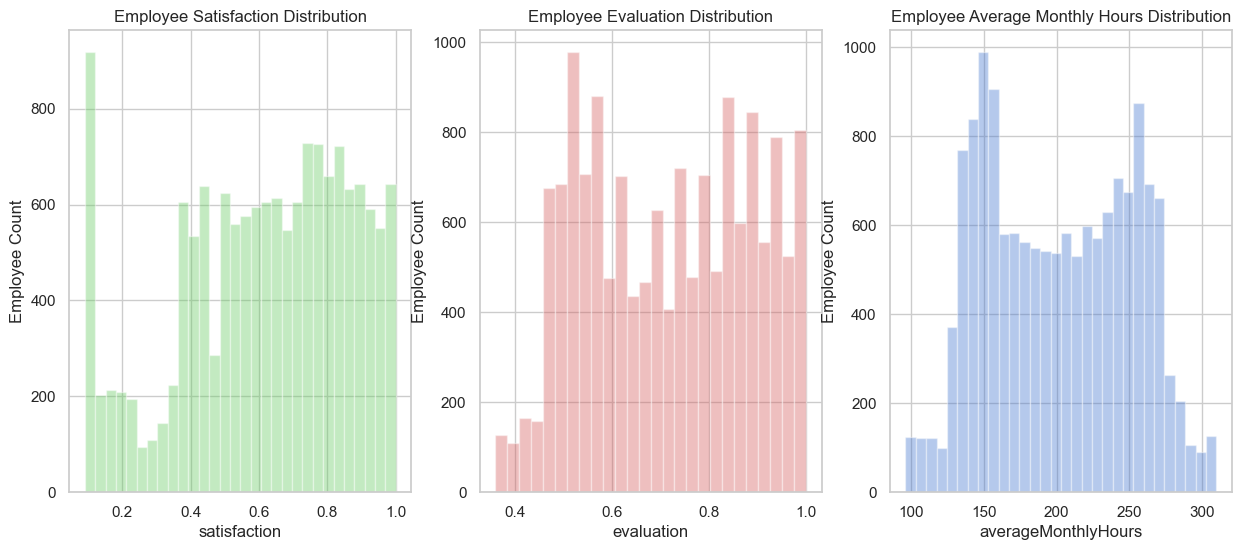

In [369]:
#setup the matplotlib
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Graph Employee Evaluation 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

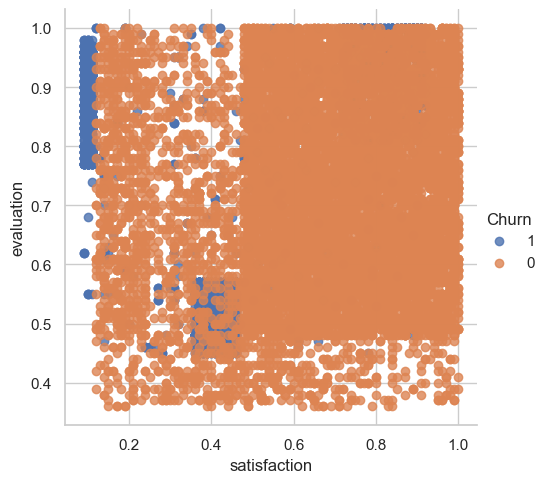

In [370]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, 
          fit_reg=False, #No regression line
          hue='Churn') #color by evolution stage

## Inference 

1) Hard working and sad employees: Satisfaction was less than 0.2 and evalutions were greater than 0.75. It means that its a good indication that employees who left the company were good workers but felt horrible at their job. 

2) Bad and sad employees: satisfaction between 0.35-0.45 and evaluations were greater than 0.8. It means that employees in this cluster were badly evaluated and felt bad at work. 

3) Hard Working and Happy employees: Satisfaction between 0.7-1.0 and evaluations were greater than 0.8. It means that these employees are happy and left for better opportunities. 

## EDA 2. K-Means Clustering of Employee Churn

In [371]:
print("Column names:", data.columns)

Column names: Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Churn', 'promotion', 'department',
       'salary', 'Cluster'],
      dtype='object')


In [372]:
le_department = LabelEncoder()
le_salary = LabelEncoder()
data['department'] = le_department.fit_transform(data['department'])
data['salary'] = le_salary.fit_transform(data['salary'])

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


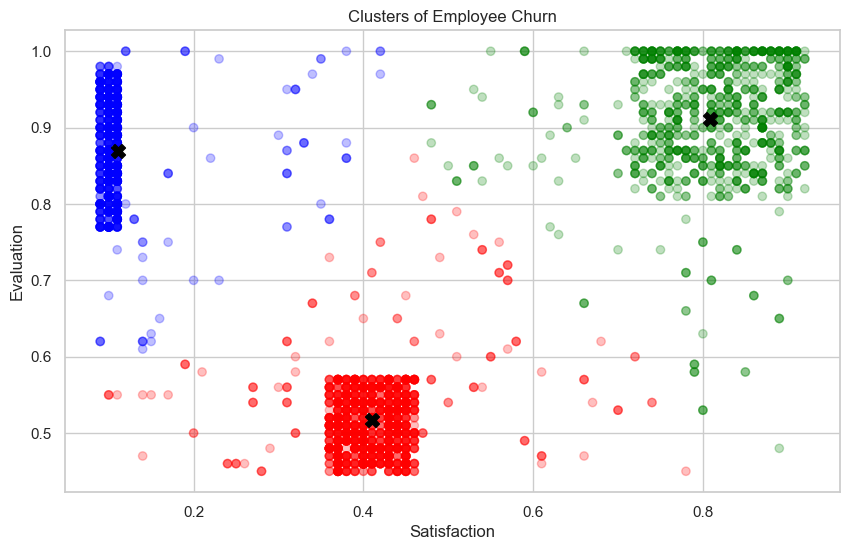

In [373]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Check if the filtered data is not empty
filtered_data = df[df['Churn'] == "1"][["satisfaction", "evaluation"]]

if not filtered_data.empty:
    # Fit K-Means with 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=2)
    kmeans.fit(filtered_data)

    # Generate colors for clusters
    kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x="satisfaction", y="evaluation", data=filtered_data,
                alpha=0.25, color=kmeans_colors)

    # Plot centroids
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                color="black", marker="X", s=100)

    plt.xlabel("Satisfaction")
    plt.ylabel("Evaluation")
    plt.title("Clusters of Employee Churn")
    plt.show()
else:
    print("No data available for employees with Churn == '1'.")


## EDA 3. Identifying Cluster Properties

<Axes: xlabel='satisfaction', ylabel='averageMonthlyHours'>

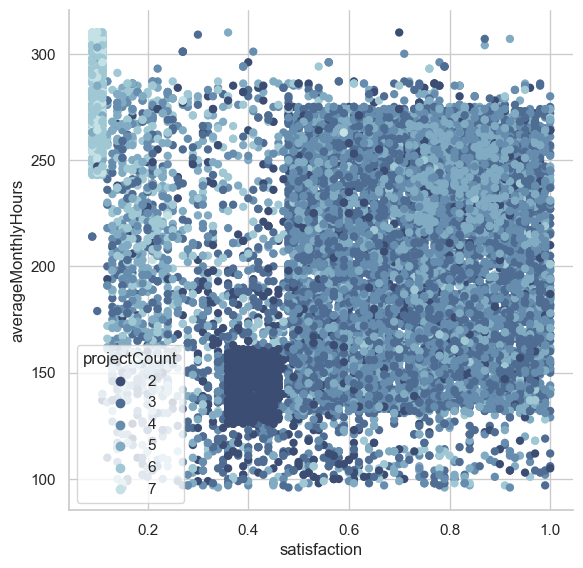

In [374]:
sns.set(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, right=True, top=True)
sns.scatterplot(x="satisfaction", y="averageMonthlyHours",
                hue="projectCount",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data, ax=ax)

Here, very important thing to notice that out of the three clusters the cluster with low satisfaction and low average monthly hours do approximately 2 projects. Hence, they could be interns and hence such a property of the cluster.

Tri-model distribution for employees that churned

1) Emplyees who had really low satisfaction score 0.2 or less left the company more. 
2) Employees who had satisfication levels 0.3-0.5 left the company more .
3) Employees who had high satisfaction levels 0.7 or more also left the company. 

## EDA 4. Employee Satisfaction

In [375]:
data['Churn'] = data['Churn'].astype(str)

# Check if data contains values
print("Data Overview:")
print(data[['satisfaction', 'evaluation', 'Churn']].head())
print("Unique values in 'Churn':", data['Churn'].unique())

# Filter data for Churn == '0' and Churn == '1'
data_no_churn = data[data['Churn'] == '0']
data_churn = data[data['Churn'] == '1']

Data Overview:
   satisfaction  evaluation Churn
0          0.38        0.53     1
1          0.80        0.86     1
2          0.11        0.88     1
3          0.72        0.87     1
4          0.37        0.52     1
Unique values in 'Churn': ['1' '0']


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


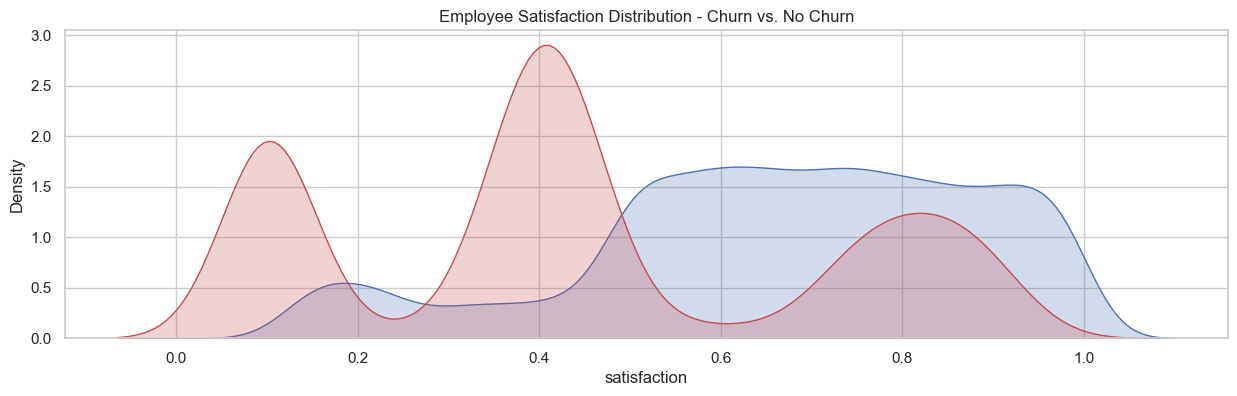

In [376]:
fig = plt.figure(figsize=(15, 4))
sns.kdeplot(data.loc[data['Churn'] == '0', 'satisfaction'], color='b', fill=True, label='No Churn')
sns.kdeplot(data.loc[data['Churn'] == '1', 'satisfaction'], color='r', fill=True, label='Churn')
plt.title('Employee Satisfaction Distribution - Churn vs. No Churn')
plt.show()



C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


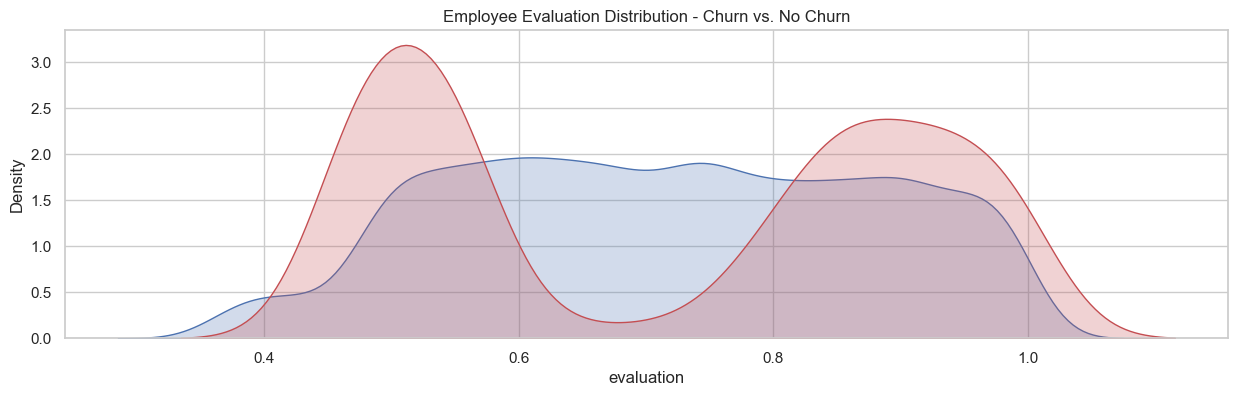

In [377]:
fig = plt.figure(figsize=(15, 4))
sns.kdeplot(data.loc[data['Churn'] == '0', 'evaluation'], color='b', fill=True, label='No Churn')
sns.kdeplot(data.loc[data['Churn'] == '1', 'evaluation'], color='r', fill=True, label='Churn')
plt.title('Employee Evaluation Distribution - Churn vs. No Churn')
plt.show()



## EDA 5. Employee department distribution

In [378]:
print("Missing values in hrleft:", hrleft['department'].isnull().sum())
print("Missing values in hrstay:", hrstay['department'].isnull().sum())


Missing values in hrleft: 0
Missing values in hrstay: 0


In [379]:

# Ensure Churn column is in string format
df['Churn'] = df['Churn'].astype(str)

# Filter the data for employees who left
hrleft = df[df['Churn'] == '1']['department'].value_counts().reset_index()
hrleft.columns = ['department', 'left']

# Count employees who stayed
hrstay = df['department'].value_counts().reset_index()
hrstay.columns = ['department', 'stay']

# Merge DataFrames
hr_merge = pd.merge(hrleft, hrstay, how='inner', on='department')

# Rename columns (if needed)
hr_merge = hr_merge.rename(columns={"left": "left", "stay": "stay"})

print("Merged DataFrame:")
print(hr_merge)

Merged DataFrame:
    department  left  stay
0        sales  1014  4140
1    technical   697  2720
2      support   555  2229
3           IT   273  1227
4           hr   215   739
5   accounting   204   767
6    marketing   203   858
7  product_mng   198   902
8        RandD   121   787
9   management    91   630


<Axes: xlabel='left', ylabel='department'>

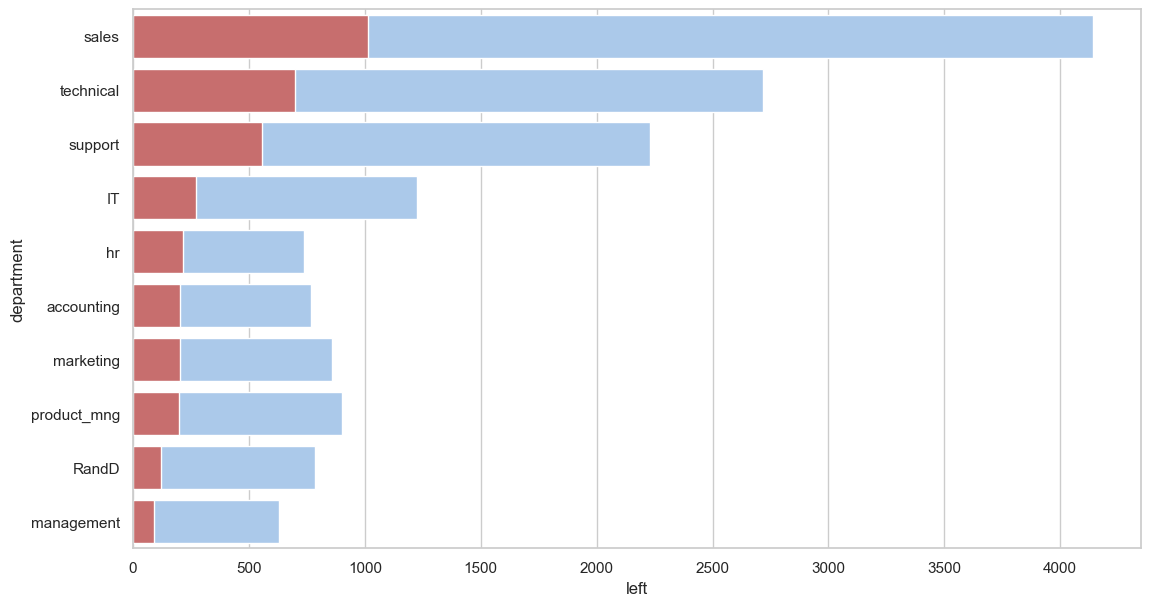

In [380]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="department", data=hr_merge,
            label="Left", color="r")

# Average Monthly Hours

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


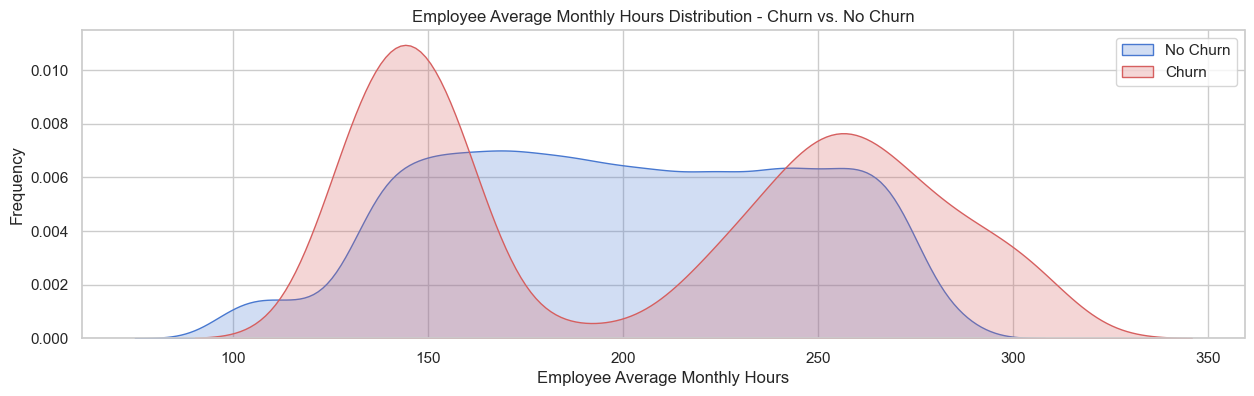

In [381]:
fig = plt.figure(figsize=(15, 4))
sns.kdeplot(data.loc[data['Churn'] == '0', 'averageMonthlyHours'], color='b', fill=True, label='No Churn')
sns.kdeplot(data.loc[data['Churn'] == '1', 'averageMonthlyHours'], color='r', fill=True, label='Churn')
plt.xlabel('Employee Average Monthly Hours')
plt.ylabel('Frequency')
plt.title('Employee Average Monthly Hours Distribution - Churn vs. No Churn')
plt.legend()

# Preprocessing

In [382]:
data['Churn'] = data['Churn'].astype(str)

# Get dummy variables for categorical features
cat_var = ['department', 'salary', 'promotion']
num_var = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(data[cat_var], drop_first=True)
numerical_df = data[num_var]

new_df = pd.concat([categorical_df, numerical_df], axis=1)



class imbalance employee churn rate 24%

# Creating training and test datasets

In [383]:
print("Columns in DataFrame:", data.columns)
data['Churn'] = data['Churn'].astype(int)


Columns in DataFrame: Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'Churn', 'promotion', 'department',
       'salary', 'Cluster'],
      dtype='object')


In [385]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve


# Define features and target
X = data.drop('Churn', axis=1)  # Features
y = data['Churn'] 
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Balancing datasets based on different sampling techniques

In [386]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample using SMOTE
sm = SMOTE(random_state=123)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)


In [390]:

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=x_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((x_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Downsample majority class
X_train_d, y_train_d = resample(x_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=x_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((x_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled SMOTE shape:", x_train_sm.shape, y_train_sm.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (10499, 10) (10499,)
Upsampled SMOTE shape: (16000, 10) (16000,)
Upsampled shape: (16000, 10) (16000,)
Downsampled shape: (4998, 10) (4998,)


### In the next part, Different ML techniques are used for prediction. Following are the techniques

Logistic regression
Support Vector Machine (SVM)
Random Forrests 
Gradient Boosting 

Using AUC we check which techniques is most suitable here

<font size="5 "><b> Logistic Regression </b></font>

In [391]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_sm, y_train_sm)
y_pred=lr.predict(x_test)

In [392]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [393]:
from sklearn.metrics import confusion_matrix, classification_report
lr_auc= accuracy_score(y_pred, y_test)
print ("\n\n ---LogisticRegression---")
print("Accuracy:{}".format( accuracy_score(y_pred, y_test)))

print("\n",classification_report(y_test, y_pred))



 ---LogisticRegression---
Accuracy:0.7624444444444445

               precision    recall  f1-score   support

           0       0.92      0.75      0.83      3428
           1       0.50      0.80      0.62      1072

    accuracy                           0.76      4500
   macro avg       0.71      0.78      0.72      4500
weighted avg       0.82      0.76      0.78      4500



# SVM

In [394]:
from sklearn.svm import SVC  
from sklearn.metrics import roc_auc_score

svc = SVC(probability=True)  # Ensure 'probability=True' for ROC AUC score
svc.fit(x_train_sm, y_train_sm)


SVC(probability=True)

In [395]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [396]:
# Calculate AUC
svm_auc = roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1])
print(f"SVM AUC = {svm_auc:.2f}")

SVM AUC = 0.77


In [397]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      3428
           1       0.42      0.72      0.53      1072

    accuracy                           0.69      4500
   macro avg       0.65      0.70      0.65      4500
weighted avg       0.77      0.69      0.71      4500



In [398]:
svm_auc = roc_auc_score(y_test, y_pred)
print("SVM AUC = {:.2f}".format(svm_auc))

SVM AUC = 0.70


In [399]:
svc_result = cross_val_score(svc, x_train, y_train, cv=9, scoring='accuracy')


# Random Forest

In [403]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
rf = model2.fit(x_train_sm, y_train_sm)
y_pred = model2.predict(x_test)
y_pred

rf_result = cross_val_score(model2, x_train_sm, y_train_sm, cv=9, scoring='f1')
rf_result


array([0.98059361, 0.98410897, 0.9875    , 0.98183882, 0.98412698,
       0.98517674, 0.97591743, 0.97772701, 0.97828571])

In [404]:
print(rf_result.mean())

0.981697252837259


In [405]:
from sklearn.metrics import roc_auc_score
y_train_sm = y_train_sm.astype(int)
y_test = y_test.astype(int)

rf = model2.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---\n")
rf_auc = roc_auc_score(y_test, rf.predict(x_test))
print ("Random Forest AUC = %2.2f" % rf_auc)
print(classification_report(y_test, rf.predict(x_test)))



 ---Random Forest Model---

Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.96      0.97      1072

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



# Gradient Boosting

In [406]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

In [407]:
from sklearn.model_selection import cross_val_score

gbc_result = cross_val_score(gbc,x_train_sm, y_train_sm, cv=9, scoring='f1')
gbc_result.mean()

0.956972887023102

In [408]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3428
           1       0.92      0.92      0.92      1072

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



# Naive Bayes Model

In [409]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize and fit the model
NB = GaussianNB()
NB.fit(X_train_sm, y_train_sm)

# Cross-validation F1 scores
nb_result = cross_val_score(NB, X_train_sm, y_train_sm, cv=9, scoring='f1')
nb_result
nb_result.mean()

0.7634554794483224

In [410]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Naive Bayes Model---")
nb_auc = roc_auc_score(y_test, NB.predict(X_test))
print ("Naive Bayes AUC = %2.2f" % nb_auc)
print(classification_report(y_test, NB.predict(X_test)))



 ---Naive Bayes Model---
Naive Bayes AUC = 0.69
              precision    recall  f1-score   support

           0       0.96      0.44      0.61      3428
           1       0.35      0.94      0.51      1072

    accuracy                           0.56      4500
   macro avg       0.65      0.69      0.56      4500
weighted avg       0.82      0.56      0.58      4500



# KNN Model

In [411]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train_sm, y_train_sm)

knn_result = cross_val_score(knn, X_train_sm, y_train_sm, cv=9, scoring='f1')

knn_result
print(knn_result.mean())

0.9422304389590119


In [412]:
print ("\n\n ---KNN Model---")
knn_auc = roc_auc_score(y_test, knn.predict(X_test))
print ("KNN AUC = %2.2f" % knn_auc)
print(classification_report(y_test, knn.predict(X_test)))



 ---KNN Model---
KNN AUC = 0.93
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3428
           1       0.75      0.95      0.84      1072

    accuracy                           0.91      4500
   macro avg       0.86      0.93      0.89      4500
weighted avg       0.93      0.91      0.91      4500



<font size=4><b>COMPARISON OF ALL MODEL </b></font>

In [413]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, NB.predict_proba(x_test)[:,1])

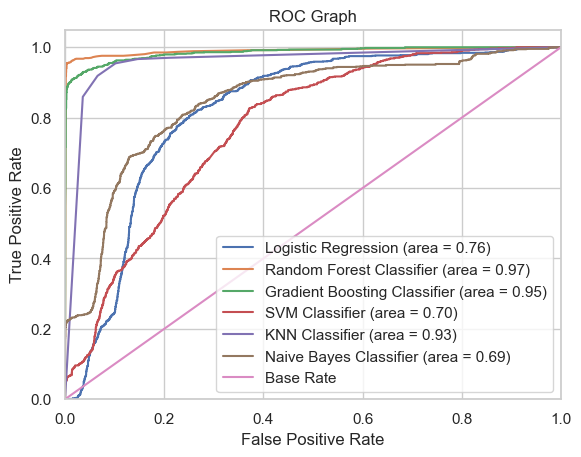

In [414]:
plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot SVM ROC 
plt.plot(svc_fpr, svc_tpr, label='SVM Classifier (area = %0.2f)' %svm_auc)

# Plot KNN ROC 
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier (area = %0.2f)' % knn_auc)

#Plot NB ROC
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes Classifier (area = %0.2f)' % nb_auc)



# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [415]:
print("\n--- ALL MODEL ACCURACY--- ")
print(f"\nLogistic Regression AUC: {100 * lr_auc:.2f}%")
print(f"Random Forest AUC: {100 * rf_auc:.2f}%")
print(f"Gradient Boosting AUC: {100 * gbc_auc:.2f}%")
print(f"SVM AUC: {100 * svm_auc:.2f}%")
print(f"KNN AUC: {100 * knn_auc:.2f}%")
print(f"Naive Bayes AUC: {100 * nb_auc:.2f}%")



--- ALL MODEL ACCURACY--- 

Logistic Regression AUC: 76.24%
Random Forest AUC: 97.45%
Gradient Boosting AUC: 94.63%
SVM AUC: 70.12%
KNN AUC: 92.62%
Naive Bayes AUC: 69.28%


In [416]:
# Optional: Find the model with the best accuracy
models_accuracy = {
    "Logistic Regression": lr_auc,
    "SVM": svm_auc,
    "Random Forests": rf_auc,
    "Gradient Boosting": gbc_auc,
    "Naive Bayes": nb_auc,
    "KNN": knn_auc,
}

best_model = max(models_accuracy, key=models_accuracy.get)
print(f"Best Model: {best_model}")
print(f"Best Accuracy: {models_accuracy[best_model]}")


Best Model: Random Forests
Best Accuracy: 0.9745489297967572


# Random Forest is the best performing classifier among all our models

In [417]:
# Confusion Matrix for Linear Regresion
confusion_matrix(y_test, lr.predict(x_test))

array([[2570,  858],
       [ 211,  861]], dtype=int64)

In [418]:
confusion_matrix(y_test, gbc.predict(x_test))

array([[3341,   87],
       [  88,  984]], dtype=int64)

In [419]:
confusion_matrix(y_test, svc.predict(x_test))

array([[2345, 1083],
       [ 302,  770]], dtype=int64)

In [420]:
confusion_matrix(y_test, model2.predict(x_test))

array([[3407,   21],
       [  48, 1024]], dtype=int64)

In [422]:
confusion_matrix(y_test, NB.predict(x_test))

array([[1514, 1914],
       [  60, 1012]], dtype=int64)

In [421]:
confusion_matrix(y_test, knn.predict(x_test))

array([[3079,  349],
       [  49, 1023]], dtype=int64)

#### Feature importances shows which feature is most important to determine the churn rate

In [423]:
import pandas as pd

# Convert X_train to a DataFrame (assuming X_train is a numpy array)
X_train_df = pd.DataFrame(x_train)

# Get Feature Importances
feature_importances = pd.DataFrame(model2.feature_importances_,
                                   index=X_train_df.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances


,index,importance
0,satisfaction,0.281753
1,yearsAtCompany,0.209596
2,averageMonthlyHours,0.155866
3,projectCount,0.138427
4,evaluation,0.118823
5,Cluster,0.053479
6,department,0.017321
7,workAccident,0.013147
8,salary,0.010442
9,promotion,0.001147


<Axes: xlabel='importance', ylabel='index'>

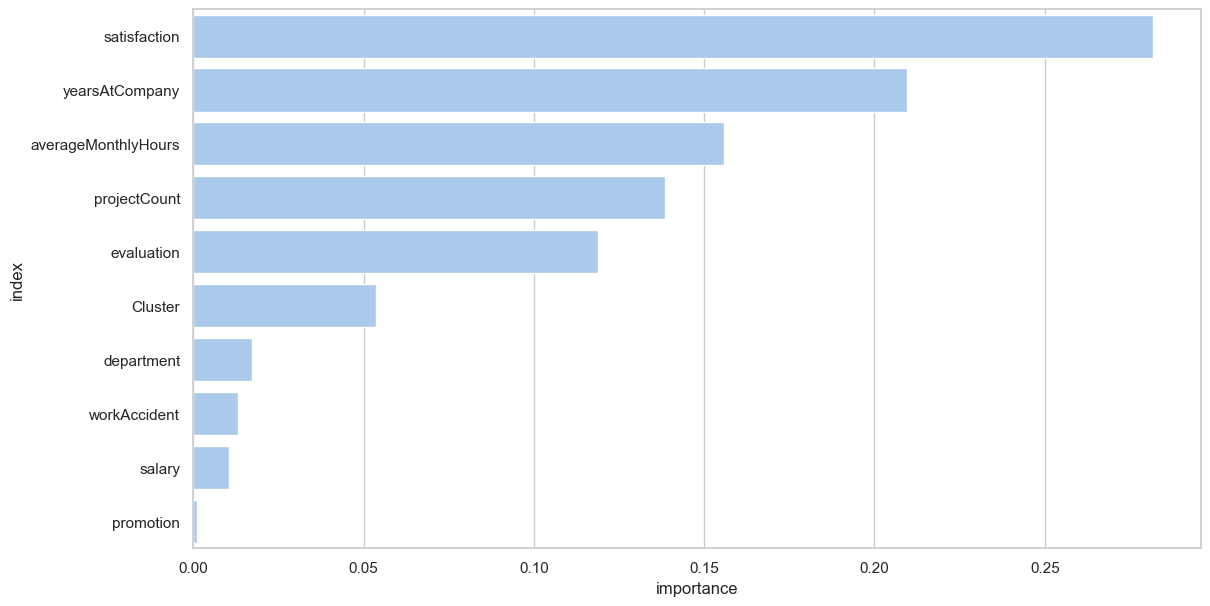

In [424]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [425]:
ypred = model2.predict_proba(x_test)

list = []
for each in ypred:
    if each[1]>0.5:
        each[1] = 1
    else:
        each[1] = 0
    list.append(each[1])
#print(np.array(list))
print(pd.DataFrame({'Ypred':list}).head(10))

   Ypred
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0


In the above array, Column two shows the probabilty of employee leaving the company. Using this we can take appropriate measures to retain the employee. 

High probabilty employees can be addressed first as they have a high chance of leaving. 

Low probabilty employees can be given more incentives to eliminate the risk of them leaving. 